<a href="https://colab.research.google.com/github/mzucali/pyMinColab/blob/main/CheckEMPA_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CHECK ANALISI EMPA

In [20]:
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))
#import pandasgui
#import ipympl
#%matplotlib widget
import seaborn as sns
import ipywidgets as widgets
import io

Python: 3.10.12 (main, Jun 11 2023, 05:26:28) [GCC 11.4.0]
scipy: 1.11.3
numpy: 1.23.5
matplotlib: 3.7.1
pandas: 1.5.3
sklearn: 1.2.2


In [21]:
from pandas import read_csv, read_excel
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
#from pandasgui import show

## UPLOAD DATA FILE
File FORMAT -

1) the first 3 rows will be skipped

2) the last 5 rows will be skipped


## OX data upload
*COLAB* upload

Upload OX file

In [22]:
## COLAB file UPLOAD
# load and read summary file from EMPA
from google.colab import files
uploaded = files.upload()

for fnOX in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fnOX, length=len(uploaded[fnOX])))

Saving 4-4-23-ox.txt to 4-4-23-ox (1).txt
User uploaded file "4-4-23-ox (1).txt" with length 2771 bytes


Upload SD file

In [23]:
## COLAB file UPLOAD
from google.colab import files
uploaded = files.upload()

for fnSD in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fnSD, length=len(uploaded[fnSD])))

Saving 4-4-23-sd.txt to 4-4-23-sd.txt
User uploaded file "4-4-23-sd.txt" with length 2795 bytes


## Jupyter file Upload NO SE SI USA COLAB!!!



In [ ]:
uploader=widgets.FileUpload(
    accept='*.xlsx',  # Accepted file extension e.g. '.txt', '.pdf', 'image/*', 'image/*,.pdf'
    multiple=False  # True to accept multiple files upload else False
)

In [ ]:
uploader

In [ ]:
uploader.value[0]
uploaded_file = uploader.value[0]
data=read_excel(io.BytesIO(uploaded_file.content))

## RUN

In [24]:
#fnOX='/Users/miki/Dropbox/Mac/Downloads/9-3-23-ox.txt'
#fnSD='/Users/miki/Dropbox/Mac/Downloads/9-3-23-SD.txt'

with open(fnOX, 'r') as file:
    lines = file.readlines()

specific_text = 'Mass percent'
if any(line.startswith(specific_text) for line in lines):
  OX = read_csv(fnOX, sep='\t',skiprows=3)[:-5]
else:
  OX = read_csv(fnOX, sep='\t')

with open(fnSD, 'r') as file:
    lines = file.readlines()

specific_text = 'Counting error(%)'
if any(line.startswith(specific_text) for line in lines):
  SD = read_csv(fnSD, sep='\t',skiprows=3)[:-5]
else:
  SD = read_csv(fnSD, sep='\t')



#fnSummary='/Users/miki/Dropbox/Development/MLMachineLearning/pythonML/ML_test2023/minerals/testSD/4-4-23.txt'
#OX = read_csv(fnOX, sep='\t', skiprows=2, skipfooter=5, engine='python') #engine='python'
#OX = read_csv(fnOX)
#OX = read_csv(fnOX, skiprows=2, sep='\t')[:-5]
#SD = read_csv(fnSD, skiprows=2, sep='\t')[:-5]
#OX = read_csv(fnOX, sep='\t',skiprows=3)[:-5]
#SD = read_csv(fnSD, sep='\t',skiprows=3)[:-5]
#OX = read_csv(fnOX, sep='\t', skiprows=[1])
#SD = read_csv(fnSD, sep='\t')

## remove UNWANTED spaces COLUMNS
OX.columns = OX.columns.str.strip()
SD.columns = SD.columns.str.strip()

print(OX)
print(SD)
#print(OX.columns)
#OX.rename(columns=lambda x: x.replace(' ', ''), inplace=True)
print(OX.columns)
#print(SD.columns)
#SD.rename(columns=lambda x: x.replace(' ', ''), inplace=True)
print(SD.columns)

        No.    Na2O  Al2O3    TiO2     MnO      K2O      MgO   SiO2   Cr2O3  \
0       1    0.1180  16.63  5.7000  0.0826   9.9400  11.7600  36.75  0.0426   
1       2    0.1750  16.80  5.4600  0.0000   9.8300  11.7600  36.80  0.0077   
2       3    0.0891  16.45  5.2100  0.0154   9.9800  11.9900  36.52  0.0407   
3       4    0.1076  16.86  5.7300  0.0000   9.8300  12.1500  36.58  0.0299   
4       5    0.1128  16.89  5.6400  0.0505   9.9800  12.2100  36.56  0.0000   
5       6    6.2300  27.38  0.0103  0.0030   0.2975   0.0108  56.71  0.0303   
6       7    6.0400  27.70  0.0000  0.0105   0.3111   0.0000  56.41  0.0040   
7       8    0.1201  16.43  6.7000  0.0731   9.7300  10.8300  36.62  0.0379   
8       9    1.2062  18.58  0.0559  0.0157  14.5800   0.0029  64.50  0.0137   
9      10    0.8196  18.96  0.0647  0.0022  15.2800   0.0181  63.82  0.0000   
10     11    0.0972  16.25  5.5000  0.0000   9.8200  12.3200  36.56  0.0000   
11     12    0.1061  16.46  5.2400  0.0782   9.7900 

In [25]:
OX.head()

,No.,Na2O,Al2O3,TiO2,MnO,K2O,MgO,SiO2,Cr2O3,FeO,CaO,Total,Comment
0,1,0.1180,16.63,5.70,0.0826,9.94,11.76,36.75,0.0426,16.00,0.0000,97.0233,MF2078-1
1,2,0.1750,16.80,5.46,0.0000,9.83,11.76,36.80,0.0077,15.83,0.0000,96.6628,MF2078-2
2,3,0.0891,16.45,5.21,0.0154,9.98,11.99,36.52,0.0407,16.74,0.0000,97.0353,MF2078-3
3,4,0.1076,16.86,5.73,0.0000,9.83,12.15,36.58,0.0299,15.21,0.0243,96.5219,MF2078-4
4,5,0.1128,16.89,5.64,0.0505,9.98,12.21,36.56,0.0000,15.37,0.0000,96.8134,MF2078-5


In [26]:
OX.columns

Index(['No.', 'Na2O', 'Al2O3', 'TiO2', 'MnO', 'K2O', 'MgO', 'SiO2', 'Cr2O3',
       'FeO', 'CaO', 'Total', 'Comment'],
      dtype='object')

In [ ]:
SD.head()

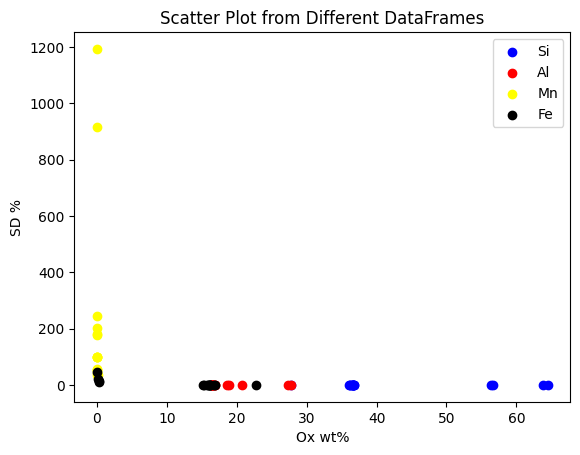

In [29]:
## kjkajkja
plt.scatter(OX.SiO2, SD.Si, label='Si', color='blue')
plt.scatter(OX.Al2O3, SD.Al, label='Al', color='red')
plt.scatter(OX.MnO, SD.Mn, label='Mn', color='yellow')
plt.scatter(OX.FeO, SD.Fe, label='Fe', color='black')
#plt.scatter(OX.Na2O, SD.Na, label='Na', color='orange')
#plt.scatter(OX.TiO2, SD.Ti, label='Ti', color='black', marker='s')

#plt.scatter(df1['X'], df1['Y'], label='DataFrame 1', color='blue')

# Adding labels and title
plt.ylabel('SD %')
plt.xlabel('Ox wt%')
plt.title('Scatter Plot from Different DataFrames')
#plt.xlim(0, 100)
#plt.ylim(0, 100)
# Adding legend
plt.legend()

plt.show()

In [ ]:
data.head(3)
data.tail(3)
data.index
data.columns


In [ ]:
#data = read_excel(infile)
#
data['Mineral'].unique()
data[data['Mineral']=="grt"].plot()
plt.show()

In [ ]:
data.to_numpy()

## UPLOAD REFERENCE FILE

In [ ]:
#infile = '/Users/miki/Dropbox/Development/MLMachineLearning/pythonML/ML_test2023/minerals/test_minerals_ML.xlsx'
#reference= '/Users/miki/Dropbox/Development/MLMachineLearning/pythonML/ML_test2023/minerals/QMIN_ALLminerals.xlsx'
reference= '/Users/miki/Dropbox/Development/MLMachineLearning/pythonML/QMineral_Modeller-master/data_input/minerals_balanced.csv'
#referenceGRT= '/Users/miki/Dropbox/Development/MLMachineLearning/pythonML/ML_test2023/minerals/garnet_model.xlsx'

In [ ]:
#data_REF = read_excel(reference)
data_REF = read_csv(reference)
print(data_REF.shape)

In [ ]:
data_REF.head(3)
#data_REF.tail(5)
#data_REF["GROUP"].unique()

#dataGRT.plot()
#plt.show()
#data_REF["TOTAL"].head(3)
#data_REF["TOTAL"].describe()

In [ ]:
#data_REF.plot()
data_REF[data_REF["GROUP"]=="GARNET"].shape
data_REF[data_REF["GROUP"]=="GARNET"].head()
#data_REF[data_REF["GROUP"]=="GARNET"].

In [ ]:
#data_REF[data_REF["GROUP"]=="GARNET"].plot(x="SOMA", y=["SIO2", "MGO","AL2O3"])
#data_REF[data_REF["GROUP"]=="GARNET"].plot(kind="scatter",x="SOMA", y="SIO2")
#data_REF[data_REF["GROUP"]=="GARNET"].to_excel('GARNET.xlsx')
#plt.show()
sum = data_REF[data_REF["GROUP"]=="GARNET"].iloc[:,7:-2].astype(float).sum(axis=1)
sum

In [ ]:
data_REF.head(3)
data_REF["SOMA"].describe()

In [ ]:
sns.scatterplot( x=data_REF["SOMA"], y=data_REF["SIO2"])
plt.show()
data_REF["SOMA"].describe()

In [ ]:
data_REF["GROUP"].unique()

In [ ]:
data_REF[data_REF['GROUP']=="GARNET"].size

In [ ]:
plt.

In [ ]:
#data_REF['Totale'].plot()
grt=data_REF[data_REF['GROUP']=="GARNET"]
sns.scatterplot(data=grt, x="SIO2", y=sum)
plt.show()
sns.histoplot(data=grt)

## Filter DATA by MINERAL

In [ ]:
#isGrt = data(data['Mineral']=="GT" | data['Mineral']=="grt")
isGrt = data['Mineral']=="grt"
#isGrt = data['Mineral']=="grt"
isGrt

#gapminder_2002 = gapminder[is_2002]
data_isGrt = data[isGrt]
sns.scatterplot(data=data_REF[data_REF['GROUP']=="GARNET"], x="SIO2", y="AL2O3", hue="GROUP", palette=['red'])
#sns.scatterplot(data=data, x="SiO2", y="Al2O3",  hue="Mineral")
plt.show()
sns.scatterplot(data=data_isGrt, x="SiO2", y="Al2O3", hue="Mineral", marker="X", palette=['blue'])

plt.show()


In [ ]:
#data.plot(kind="box")
sns.boxplot(data)
plt.show()

In [ ]:
#axs = data.plot.area(figsize=(12, 4), subplots=True)
#plt.show()
sns.histplot(data)
plt.show()

In [ ]:
%who_ls

In [ ]:
%whos

## Calc Total

In [ ]:
if 'Total_new' in data_REF.columns:
    print("Yes")
    del data_REF['Total_new']
    data_REF
else:
    print("No")
total = data_REF.iloc[:,2:-1].astype(float).sum(axis=1)
sns.histplot(total)
plt.show()

In [ ]:
data_REF_check = data_REF.copy()
data_REF_check['Total_new'] = total
#data_REF['Total_new'] = total
#newData = data.copy()
#print(total)
#sns.histplot(total).set(title='Total Hist1')
#plt.show()
data_REF_check[data_REF_check["REFERENCE MINERAL"]=="Garnet"]["Total_new"]
#dr.loc[dr['Total_new']]
#dr["Total_new"]
sns.histplot(data_REF_check[data_REF_check["REFERENCE MINERAL"]=="Garnet"]["Total_new"]).set(title='Total Hist Ref_Check')
plt.show()
#print(data['Mineral'])

#sns.histplot(data_REF).set(title='Hist ALL')
#plt.show()

In [ ]:
data_REF_check[data_REF_check["REFERENCE MINERAL"]=="Garnet"].to_excel("outgrt.xlsx")

In [ ]:
data_REF['Total_new'].describe()

In [ ]:
sns.scatterplot(data=data_REF, x="SIO2", y="Total_new", marker="X")
plt.show()

In [ ]:
#!/Users/miki/miniconda3/bin/pip3 install seaborn

In [ ]:
##!/Users/miki/miniconda3/bin/pip3 install git+https://github.com/adamerose/pandasgui.git


In [ ]:
gui = show(data,dataGRT)

In [ ]:
sns.histplot(data['SiO2']).set(title='Hist ALL')
plt.show()